In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt

c:\Users\maviy\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


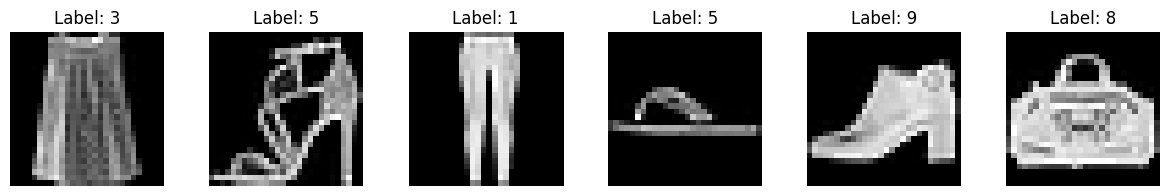

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


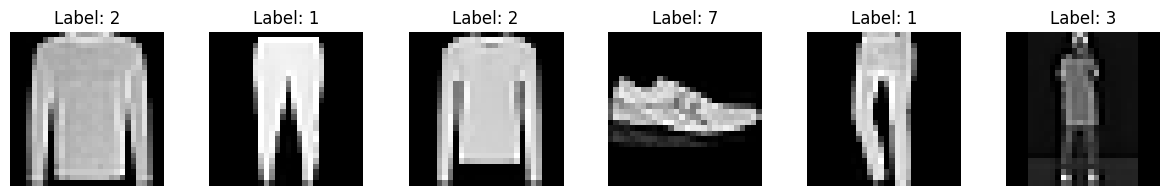

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


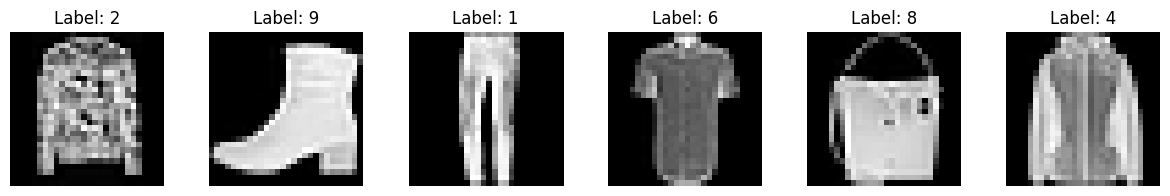

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


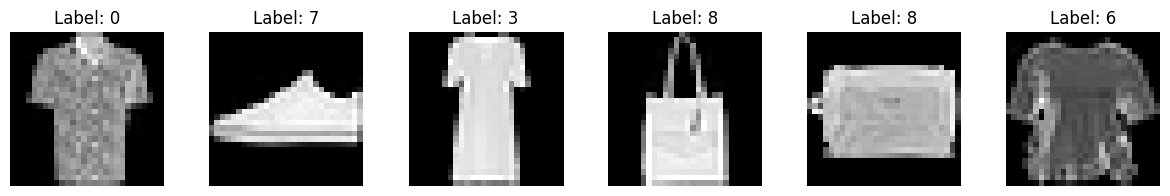

Batch of images shape: torch.Size([64, 1, 28, 28])
Batch of labels shape: torch.Size([64])


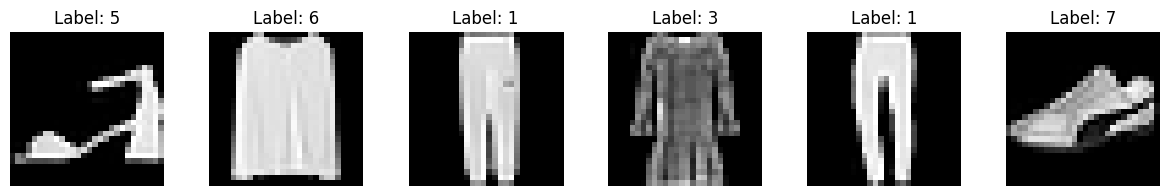

In [3]:
def show_images(images, labels, num_images=6):
    pil_transform = ToPILImage()
    fig, axes = plt.subplots(1, num_images, figsize=(15, 2))
    
    for i in range(num_images):
        img = pil_transform((images[i] * 0.5) + 0.5)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {labels[i].item()}")
        axes[i].axis('off')
    
    plt.show()

i = 0

for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    
    show_images(images, labels, num_images=6)
    i += 1
    if i == 5:
        break
    


In [9]:
# Define the CNN model using nn.Sequential
model = nn.Sequential(
    # Convolutional layer 1: input channels = 1, output channels = 32, kernel size = 3
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # Convolutional layer 2: input channels = 32, output channels = 64, kernel size = 3
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Flatten(),
    
    # Fully connected layer 1: input features = 64*7*7, output features = 128
    nn.Linear(in_features=64*7*7, out_features=128),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    
    # Fully connected layer 2 (output layer): input features = 128, output features = 10
    nn.Linear(in_features=128, out_features=10)
)
print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=128, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.5, inplace=False)
  (10): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [11]:
# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 0.5701
Epoch [2/10], Loss: 0.3739
Epoch [3/10], Loss: 0.3177
Epoch [4/10], Loss: 0.2830
Epoch [5/10], Loss: 0.2616
Epoch [6/10], Loss: 0.2390
Epoch [7/10], Loss: 0.2227
Epoch [8/10], Loss: 0.2087
Epoch [9/10], Loss: 0.1983
Epoch [10/10], Loss: 0.1870


In [14]:
accuracy_record = []

In [15]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")
accuracy_record.append({"Model 1":accuracy})


Test Accuracy: 91.82%


In [35]:
model2 = nn.Sequential(
    # Convolutional layer 1: input channels = 1, output channels = 32, kernel size = 3
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Convolutional layer 2: input channels = 32, output channels = 64, kernel size = 3
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Convolutional layer 3: input channels = 64, output channels = 128, kernel size = 3
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    # Convolutional layer 4: input channels = 128, output channels = 256, kernel size = 3
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),
    
    # Fully connected layer 1: input features = 256, output features = 128
    nn.Linear(in_features=256, out_features=128),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    
    # Fully connected layer 2 (output layer): input features = 128, output features = 10
    nn.Linear(in_features=128, out_features=10)
)

# Print model
print(model2)


Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=256, out_features=128, bias=True)
  (14): ReLU()
  (15): Dropout(p=0.5, inplace=False)
  (16): Linear(in_features=128, out_features=10, bias=True)
)


In [36]:
# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model2(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 2.3046
Epoch [2/10], Loss: 2.3047
Epoch [3/10], Loss: 2.3046
Epoch [4/10], Loss: 2.3045
Epoch [5/10], Loss: 2.3047
Epoch [6/10], Loss: 2.3047
Epoch [7/10], Loss: 2.3046
Epoch [8/10], Loss: 2.3046
Epoch [9/10], Loss: 2.3045
Epoch [10/10], Loss: 2.3047


In [39]:
model2.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model2(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")
accuracy_record.append({"Model 2":accuracy})


Test Accuracy: 10.00%


In [42]:
model3 = nn.Sequential(
    # Convolutional layer 1: input channels = 1, output channels = 32, kernel size = 3
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # Convolutional layer 2: input channels = 32, output channels = 64, kernel size = 3
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    # Convolutional layer 3: input channels = 64, output channels = 128, kernel size = 3
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),

    nn.Flatten(),
    
    # Fully connected layer 1: input features = 128, output features = 128
    nn.Linear(in_features=1152, out_features=128),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    
    # Fully connected layer 2 (output layer): input features = 128, output features = 10
    nn.Linear(in_features=128, out_features=10)
)

# Print the model architecture
print(model3)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1152, out_features=128, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.5, inplace=False)
  (13): Linear(in_features=128, out_features=10, bias=True)
)


In [43]:
# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model3(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/10], Loss: 2.3033
Epoch [2/10], Loss: 2.3035
Epoch [3/10], Loss: 2.3035
Epoch [4/10], Loss: 2.3035
Epoch [5/10], Loss: 2.3035
Epoch [6/10], Loss: 2.3035
Epoch [7/10], Loss: 2.3035
Epoch [8/10], Loss: 2.3034
Epoch [9/10], Loss: 2.3035
Epoch [10/10], Loss: 2.3033


In [44]:
model3.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model3(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")
accuracy_record.append({"Model 3":accuracy})


Test Accuracy: 11.31%
